<a href="https://colab.research.google.com/github/joynaomi81/CODSOFT/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')

Exploratory Data Analysis

In [4]:
# Check for first 5 rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Check for last 5 rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.shape

(200, 4)

In [8]:
for col in df.columns:
  print(col)

TV
Radio
Newspaper
Sales


**Data** **Cleaning**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


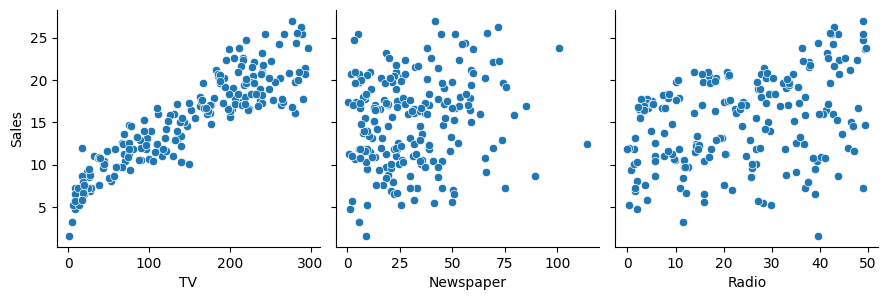

In [11]:
#Scatterplot
sns.pairplot(df, x_vars=['TV','Newspaper', 'Radio'], y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

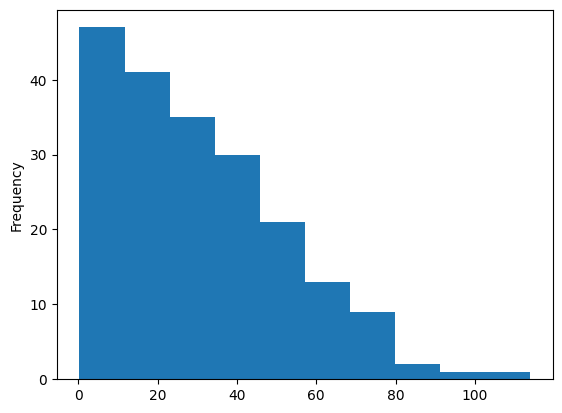

In [12]:
df['Newspaper'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

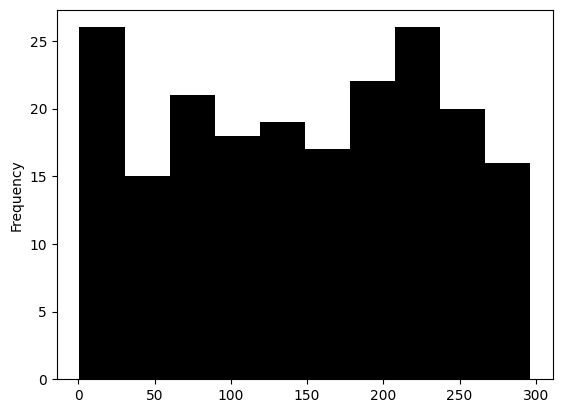

In [13]:
df['TV'].plot.hist(bins=10, color='black')

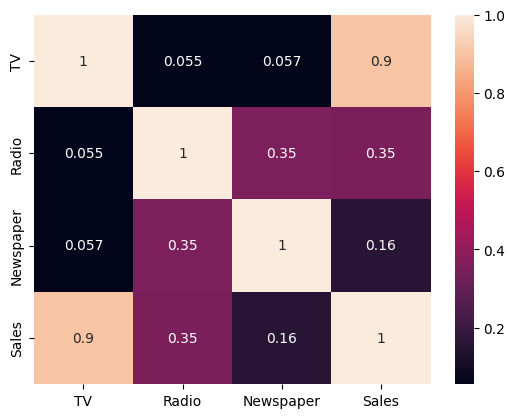

In [14]:
sns.heatmap(df.corr(),annot= True)
plt.show()

Using Linear Regression

In [15]:
x=df['TV']
y=df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], train_size=0.3, random_state=42)


In [17]:
print(x_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
..     ...
138   43.0
3    151.5
105  137.9
53   182.6
133  219.8

[140 rows x 1 columns]


In [18]:
x_train.head()

,TV
180,156.6
178,276.7
185,205.0
49,66.9
80,76.4


In [19]:
y_train.head()

,Sales
180,15.5
178,16.8
185,22.6
49,9.7
80,11.8


In [20]:
y_test.head()

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
pred=model.predict(x_test)
print(pred)

[[16.04788853]
 [17.83287474]
 [23.25456185]
 [ 7.61786016]
 [19.21749022]
 [11.14334695]
 [19.02286556]
 [ 9.74761007]
 [19.33426502]
 [16.70405168]
 [ 8.71887969]
 [10.09237376]
 [20.00711029]
 [ 7.26753576]
 [14.7244408 ]
 [16.43157715]
 [ 7.37318915]
 [17.95521025]
 [11.15446836]
 [20.16837073]
 [19.72907506]
 [10.73741551]
 [ 9.0803255 ]
 [20.91906587]
 [10.80414397]
 [ 9.94223473]
 [18.8393623 ]
 [14.71331939]
 [11.81619223]
 [ 7.4343569 ]
 [18.07754575]
 [10.81526538]
 [18.02749941]
 [ 7.9070168 ]
 [22.57615588]
 [20.21285637]
 [ 9.65307809]
 [22.18690655]
 [13.48440365]
 [ 8.4964515 ]
 [13.41767519]
 [16.80970507]
 [ 9.36392144]
 [10.43157675]
 [19.4232363 ]
 [ 9.09144691]
 [10.89311524]
 [15.15817577]
 [12.78375485]
 [11.21007541]
 [11.3157288 ]
 [16.33148447]
 [ 7.45103901]
 [ 7.40099267]
 [11.21563612]
 [14.16280962]
 [11.04881497]
 [23.0766193 ]
 [ 8.05715583]
 [17.95521025]
 [22.77634125]
 [17.24900075]
 [13.24529334]
 [ 8.29070543]
 [23.13222635]
 [ 8.04603442]
 [23.29348

In [23]:
model.coef_

array([[0.05560705]])

In [24]:
model.intercept_

array([6.9672577])

In [25]:
0.05560705* 69.2 + 6.9672577

10.81526556

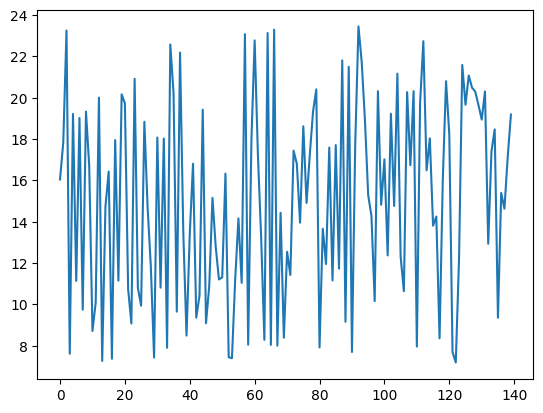

In [ ]:
plt.plot(pred)

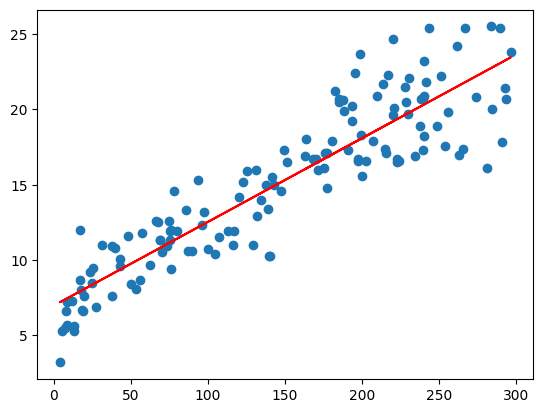

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9672577 + 0.05560705 * x_test, 'r')
plt.show()